## 4. Measures of Central Tendency

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset from a local folder into a DataFrame

In [8]:
# df = pd.read_csv('data/bottling_maintenance_events.csv')
# df.head()

### Load dataset from url into a DataFrame

In [3]:
import pandas as pd

# Use the raw GitHub URL instead of a local path
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/2_Statistics/data/bottling_maintenance_events.csv"

df = pd.read_csv(url)
df.head()

,event_date,line,asset_id,failure_mode,time_to_failure_days,repair_time_hours,downtime_hours
0,2024-01-02,C,C-M2,Electrical,129.9,3.48,4.94
1,2024-01-02,A,A-M10,Mechanical,19.2,3.93,6.56
2,2024-01-02,C,C-M2,Mechanical,22.4,2.22,3.77
3,2024-01-03,B,B-M5,Mechanical,95.9,6.46,10.79
4,2024-01-09,C,C-M1,Mechanical,64.2,4.83,5.71


### Compute mean, median, and mode for maintenance metrics

In [4]:
mtbf_mean = df['time_to_failure_days'].mean()
mtbf_median = df['time_to_failure_days'].median()
mtbf_mode = df['time_to_failure_days'].mode().iloc[0]
print(f"Mean time to failure (days): {mtbf_mean:.2f}")
print(f"Median time to failure (days): {mtbf_median:.2f}")
print(f"Mode time to failure (days): {mtbf_mode}")

Mean time to failure (days): 67.22
Median time to failure (days): 57.95
Mode time to failure (days): 67.3


**Interpretation**
- If the distribution is skewed, the median may better represent a typical value than the mean.
- Mode is useful when a particular value repeats (e.g., common repair durations due to standard procedures).

### Compute the mean and median for repair_time_hours (overall)

In [5]:
mean_repair = df['repair_time_hours'].mean()
median_repair = df['repair_time_hours'].median()

print(f"Overall mean repair time (hours): {mean_repair:.2f}")
print(f"Overall median repair time (hours): {median_repair:.2f}")

Overall mean repair time (hours): 5.94
Overall median repair time (hours): 5.95


### Compare across lines: mean and median by line

In [6]:
repair_summary = df.groupby('line')['repair_time_hours'].agg(['mean', 'median'])
print("\nMean and Median Repair Time by Line:")
print(repair_summary)


Mean and Median Repair Time by Line:
          mean  median
line                  
A     5.835789   5.920
B     6.155930   6.095
C     5.783559   5.510


### Visualize with boxplots to see distribution differences

<Figure size 600x400 with 0 Axes>

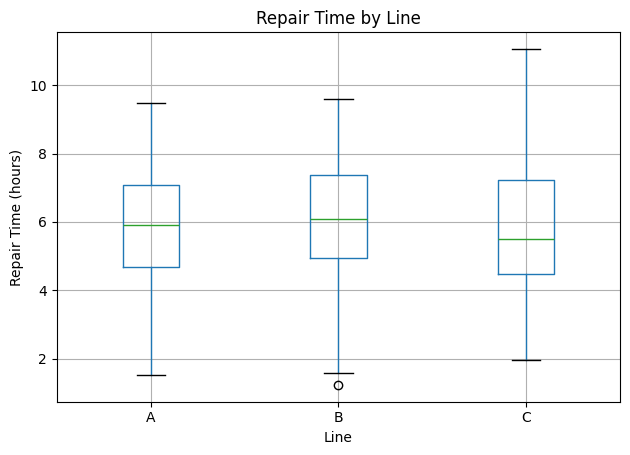

In [7]:
plt.figure(figsize=(6,4))
df.boxplot(column='repair_time_hours', by='line')
plt.title('Repair Time by Line')
plt.suptitle('')
plt.xlabel('Line')
plt.ylabel('Repair Time (hours)')
plt.tight_layout()
plt.show()